In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

*Sadie*

In [75]:
sales_publisher = video_games.loc[:, ["Global_Sales", "Publisher"]]
sales_publisher.describe()

NameError: name 'video_games' is not defined

In [ ]:
#specify by size
plt.figure(figsize=(25, 8))

#calculate the sum of 'Global_Sales' for each 'Publisher'
#Use .nlargest(10) method to retrieve the top 10 publishers with the highest global sales
publisher_sales = video_games.groupby('Publisher')['Global_Sales'].sum().nlargest(10)

#Use seaborn's barplot function to generate vertical bars for each publisher
sns.barplot(x = publisher_sales.index, y = publisher_sales.values)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.show()

top_publishers = video_games[video_games['Publisher'].isin(publisher_sales.index)]

min_global_sales = top_publishers['Global_Sales'].min()
max_global_sales = top_publishers['Global_Sales'].max()

print('Minimum Global Sales:', min_global_sales)
print('Maximum Global Sales:', max_global_sales)

mean_sales = top_publishers['Global_Sales'].mean()
median_sales = top_publishers['Global_Sales'].median()
range_sales = top_publishers['Global_Sales'].max() - top_publishers['Global_Sales'].min()

print("Mean: ", mean_sales)
print("Median: ", median_sales)
print("Range: ", range_sales)

NameError: name 'video_games' is not defined

<Figure size 2500x800 with 0 Axes>

*Blair*

In [4]:
vgsales = pd.read_csv("/home/blair/cognixia/AdvancedPhase/Data_Analytics_Project/VGSales.csv")

In [5]:
gcs = pd.DataFrame ({
    'Genre': vgsales['Genre'],
    'North America': vgsales['NA_Sales'],
    'Europe': vgsales['EU_Sales'],
    'Japan': vgsales['JP_Sales']
})

gcs

,Genre,North America,Europe,Japan
0,Sports,41.36,28.96,3.77
1,Racing,15.68,12.76,3.79
2,Sports,15.61,10.93,3.28
3,Platform,11.28,9.14,6.50
4,Misc,13.96,9.18,2.93
...,...,...,...,...
6531,Action,0.00,0.01,0.00
6532,Fighting,0.01,0.00,0.00
6533,Action,0.00,0.01,0.00
6534,Shooter,0.01,0.00,0.00


In [6]:
'''
This kernal specifies the unique categories for genre 
within the Video Game Sales Database.
'''

genre = gcs['Genre'].unique()
genre

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [7]:
'''
This kernal groups the total sales of each geographical location
by the genre and combines the results into
one dataframe.
'''
naSales = pd.DataFrame(gcs.groupby('Genre')['North America'].sum())
euSales = pd.DataFrame(gcs.groupby('Genre')['Europe'].sum())
jpSales = pd.DataFrame(gcs.groupby('Genre')['Japan'].sum())
genreSales = pd.concat([naSales, euSales, jpSales], axis=1)
# genreSales = pd.concat([naSales, euSales, jpSales], axis=0) # example of why the axis is important/necessary

genreSales

,North America,Europe,Japan
Genre,,,
Action,503.47,316.88,69.87
Adventure,35.46,21.29,8.54
Fighting,135.12,60.07,27.85
Misc,216.32,118.42,33.18
Platform,180.62,100.77,40.74
Puzzle,33.16,24.02,14.98
Racing,219.93,161.71,27.66
Role-Playing,177.89,80.13,118.62
Shooter,306.19,182.73,13.22


The bar plot below exhibits the total amount of sales in each geographical location (North America, Europe, and Japan) based on the genre of game.
The action and sports games sold at a significantly higher rate than the other genres in North America and Europe with the shooter genre selling the 3rd most in both countries.
Japan's most popular genre, based on sales, was role-playing followed by action then platform. 
Additionally, North America had the highest amount of sales in all genres.
Europe had the second highest amount of sales in genres with the exception of role-playing, in which Japan had the second highest amount.

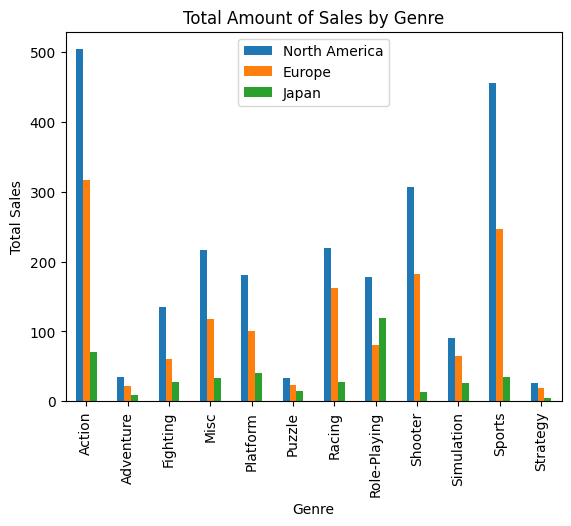

In [8]:
genreSales.plot(kind='bar')
plt.title('Total Amount of Sales by Genre')
plt.ylabel('Total Sales')
plt.show()

The plot below shows matching results for the bar graph above in a Kernel Density Estimate(KDE) format.

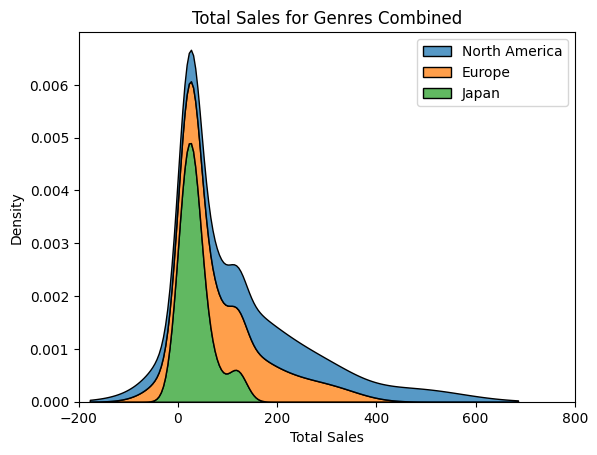

In [9]:
'''
This kernal exhibits the results of the
previous kernal in a KDE plot to display the 
sales of each geographical location by genre.
'''
sns.kdeplot(genreSales, multiple='stack').set(title='Total Sales for Genres Combined', xlabel='Total Sales')
plt.xlim(-200, 800)

plt.show()

The bar plot below displays the range in sales for each geographical location (North America, Europe, and Japan).
North America had the greatest range of sales with a minimum of 25.98 and a maximum of 503.47 resulting in a range of 477.99.
Europe's range of sales followed behind North America's with a minimum of 19.62 and a maximum of 316.88 resulting in a range of 297.26.
Lastly, Japan recorded a minimum of 4.30 and a maximum of 118.62 resulting in a range of 114.32.

North America    477.49
Europe           297.26
Japan            114.32
dtype: float64

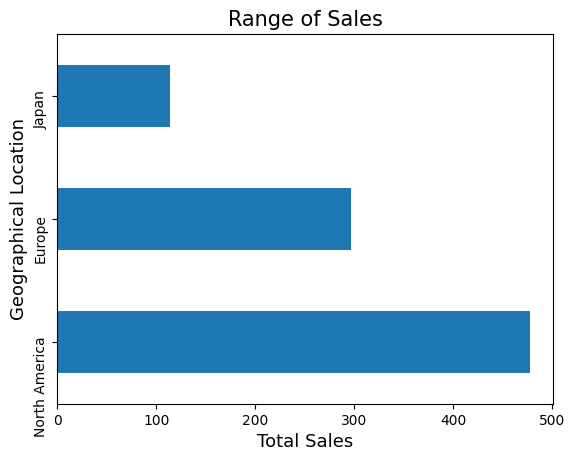

In [34]:
# SALES RANGE FOR EACH GEOGRAPHICAL LOCATION

'''
This kernal calculates the range of sales for each geographical location.
'''

# genreSales.max()
# North America    503.47
# Europe           316.88
# Japan            118.62

# genreSales.min()
# North America    25.98
# Europe           19.62
# Japan             4.30

gcsRange = genreSales.max() - genreSales.min()
gcsRange
gcsRange.plot(kind='barh')
plt.title('Range of Sales', size=15)
plt.xlabel('Total Sales', size=13)
plt.ylabel('Geographical Location', size=13)
plt.yticks(rotation=90)
gcsRange

In [11]:
naV = statistics.variance(gcs['North America'])
eV = statistics.variance(gcs['Europe'])
jV = statistics.variance(gcs['Japan'])

gcsVariance = [naV, eV, jV]
gcsVariance

[0.8050487911434429, 0.4184643375867071, 0.08467205247331243]

The scatter plot below displays the variance for each geographical location:

North America- 0.8050487911434429

Europe- 0.4184643375867071

Japan- 0.08467205247331243

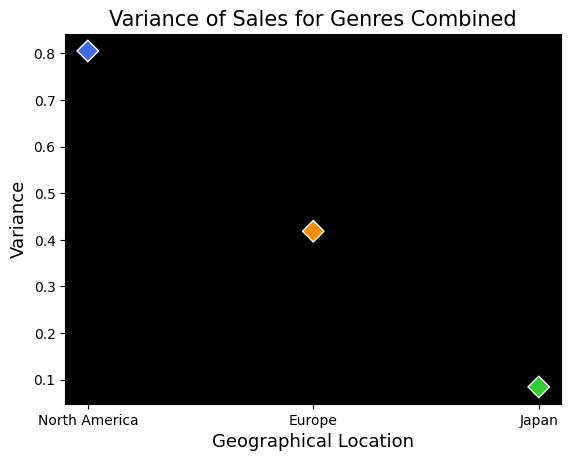

In [30]:
'''
This kernal exhibits the results of the
previous kernal in a scatter plot to display the 
variance of sales for each geographical location by genre.
'''

markerSize= 120
axes = plt.axes()
plt.scatter(x=['North America', 'Europe', 'Japan'], y=gcsVariance,color=('royalblue', 'darkorange', 'limegreen'), edgecolor='white', marker='D', s=markerSize)
plt.title("Variance of Sales for Genres Combined", size=15)
plt.xlabel('Geographical Location', size=13)
plt.ylabel('Variance', size=13)
axes.set_facecolor('black')

In [36]:
genreSales.mean()

North America    198.275000
Europe           116.379167
Japan             34.970000
dtype: float64

The violin plot below displays the average amount of sales for each geographical location with genres combined. The white dot displayed on the black rectangle marks the average amount on the plot.

North America had an average of 198.28

Europe had an average of 116.38

Japan had an average of 34.97

North America    198.275000
Europe           116.379167
Japan             34.970000
dtype: float64

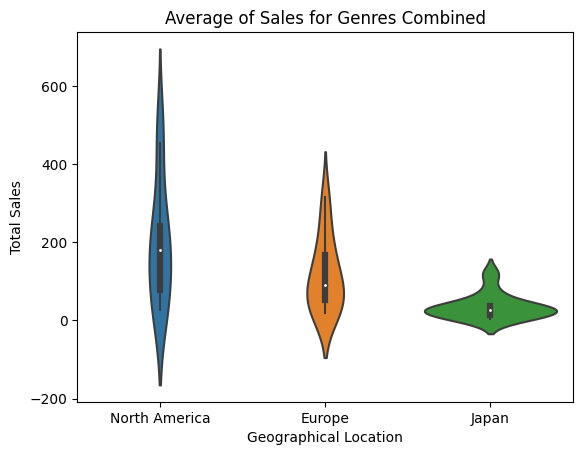

In [35]:
gcsMean = genreSales.mean()
sns.violinplot(data=genreSales).set(title='Average of Sales for Genres Combined', xlabel='Geographical Location', ylabel='Total Sales')
gcsMean

The histogram plot below exhibits the total amount of sales in each geographical location with the genres combined.
Each colored box on the plot represents the percentage (relative frequency) of sales within that container.

For example:

The blue box in the bottom right corner of the plot represents North America having about 2.5% sales around the amount of 500.

[Text(0.5, 1.0, 'Total Sales for Genres Combined'),
 Text(0.5, 0, 'Total Sales'),
 Text(0, 0.5, 'Container Count')]

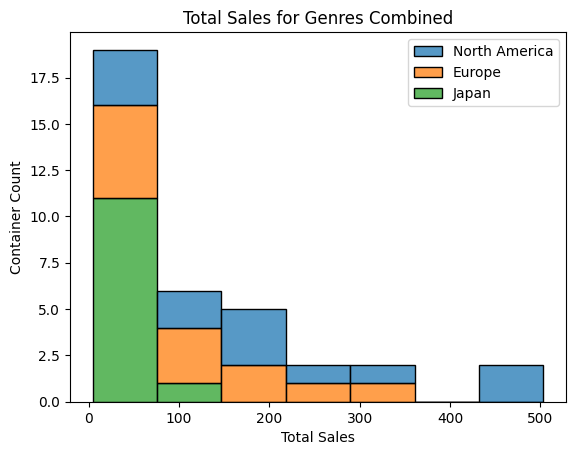

In [15]:
sns.histplot(genreSales, multiple='stack').set(title='Total Sales for Genres Combined', xlabel='Total Sales', ylabel='Container Count')

The distribution plot below exhibits the total amount of sales in each geographical location with the genres combined.
Each colored box on the plot represents the variation in data distribution of sales within that container.

For example:

The blue box in the bottom right corner of the plot represents North America having a varition of about 2 around the amount of 500.

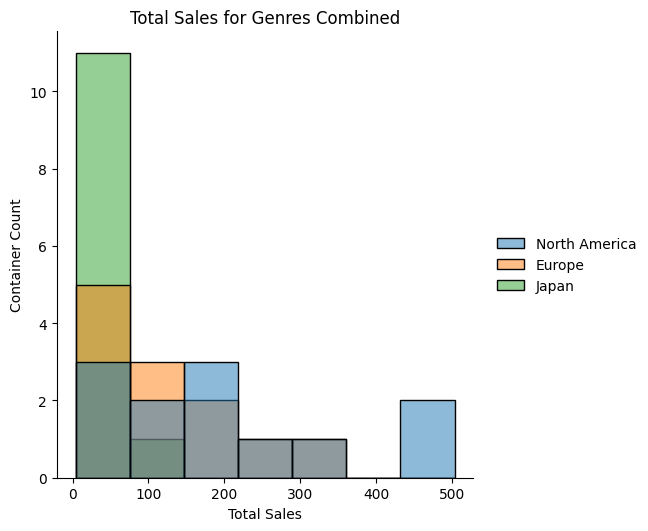

In [16]:
sns.displot(genreSales).set(title='Total Sales for Genres Combined', xlabel='Total Sales', ylabel='Container Count')

*Tangi*